### 인스타그램 시각화

In [5]:
#라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import konlpy
import re
re.compile('<title>(.*)</title>')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

from konlpy.tag import Kkma
from konlpy.tag import Okt
from konlpy.utils import pprint
kkma = Kkma()

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 


In [6]:
#데이터 불러오기
df=pd.read_excel('인스타그램_final.xlsx')

텍스트 전처리

In [7]:
# \n, .\n, \n. 등 삭제
for data in range(len(df['본문내용'])):  
    data_final=re.sub('.\n|\n|\n.','',df['본문내용'][data])
    df['본문내용'][data]=data_final
df

C:\Users\User\AppData\Local\Temp\ipykernel_21484\359874751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['본문내용'][data]=data_final
C:\Users\User\AppData\Local\Temp\ipykernel_21484\359874751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['본문내용'][data]=data_final
C:\Users\User\AppData\Local\Temp\ipykernel_21484\359874751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['본문내용'][data]=data_final
C:\Users\User\AppData\

,게시물번호,아이디,본문내용,해시태그,좋아요수,댓글아이디,댓글내용
0,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,make_it_count_0526,분해서 눈물이 났구나ㅋㅋㅋㅋ
1,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,su4224,엇 우주복인줄 알았넹
2,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,osoyu3,ㅎㅎ 의미도 좋지만 요즘엔 사는것이 훨 이쁘답니다^ ^ 근데 베넷저고리가 엄청 크네요😍😍
3,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,dd.mom1225,1년은 입겠네요ㅋㅋㅋ😍😍
4,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,rain__dog,❤️
...,...,...,...,...,...,...,...
321,10,reir.seoul,레이르프로젝트만#돌촬#레이르프로젝트,"돌촬영, 레이르프로젝트",여러 명,shkim9063,아이의 웃는 모습이 천사같아요^^
322,10,reir.seoul,레이르프로젝트만#돌촬#레이르프로젝트,"돌촬영, 레이르프로젝트",여러 명,msrs869,사진이 귀엽고 예쁘게 정말 잘찍으셨어요
323,10,reir.seoul,레이르프로젝트만#돌촬#레이르프로젝트,"돌촬영, 레이르프로젝트",여러 명,ssiimm.5844,돌촬영 너무 귀엽고 예쁘네요
324,10,reir.seoul,레이르프로젝트만#돌촬#레이르프로젝트,"돌촬영, 레이르프로젝트",여러 명,soxol_,돌촬영 너무 귀엽게 잘 나온것 같아영 ㅋㅋ


In [8]:
#명사/형용사 추출

#문장에서 명사/형용사 추출하는 함수
def get_nouns(str):
    okt=Okt()
    line=[]
    
    line=okt.pos(str) #형태소 분석으로 품사 확인
    n_adj=[] #명사, 형용사 리스트
    
    for word,tag in line:
        if tag in ['Noun','Adjective']: #명사, 형용사인 경우 n_adj리스트에 넣어주기
            n_adj.append(word)
    
    return n_adj

In [9]:
#불용어 처리 (총 682개)

#불용어 처리 함수
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    
    #한국어에 자주 등장하는 불용어 리스트
    stop_words='정말 입니다 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 명 생각 시간 그녀 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 '
    stop_words+='이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하'
    stop_words=stop_words.split(' ')

    result = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            result.append(w) 
    
    return result
#test1= remove_stop_words(df['본문내용'][0])
#print(" ".join(test1))

게시물 본문내용 전처리

In [10]:
#본문내용 불러오기

df_content=df[['게시물번호','본문내용']]
df_content=df_content.drop_duplicates()
df_content=df_content.reset_index() #인덱스 리셋안하면 원래 인덱스대로 인식해서 밑에 안돌아감
# df_content

# 본문내용에서 명사, 형용사 리스트 불러오기

nouns_list=[]
for i in range(len(df_content)):
    
    nouns=get_nouns(df_content['본문내용'][i]) #명사/형용사 추출함수 활용
    nouns=" ".join(nouns)
    text=remove_stop_words(nouns) #불용어처리 함수 활용
    nouns_list.append(text)
# print(nouns_list)

nouns_list=sum(nouns_list, []) #하나의 리스트로 만들기
print(nouns_list) 

# word count - TF(Term Frequency)
word_count={} #사전 만들기
for word in nouns_list:
    if word in word_count: #사전에 단어가 있으면 단어 개수 1 증가
        word_count[word] +=1  
    else:
        word_count[word]=1 #사전에 단어가 없으면 단어 개수 1로 설정
        
print(word_count)

['영미', '선물', '출처', '신봉선', '신봉선', '배냇저고리', '세트', '친정', '엄마', '아빠', '딸', '임신', '소식', '처음', '접', '제일', '먼저', '선물', '배냇저고리', '세트', '귀여운', '양말', '배냇저고리', '바디', '수트', '고정', '있지', '자꾸만', '배', '크롭티', '바람', '현실', '육아', '피하', '배냇저고리', '이후', '영원히', '입지', '같아', '생', '마지막', '자리', '기념', '배냇저고리', '샷', '마음', '졸', '사이즈', '신생아', '모습', '귀여운', '느낌', '예정일', '쬬', '갑자기', '생', '토끼', '띠', '호랑이', '띠', '머리', '발끝', '토끼', '귀여오', '밀크', '있는', '스커트', '디자인', '배냇저고리', '퓨어', '화이트', '배냇', '스커트', '여름', '인지', '인기', '요즘', '요', '옵션', '헤어', '밴드', '닉딸', '조합', '할인', '가격', '있으니', '참고', '욤', '밀크', '퓨어', '화이트', '배', '냇스커', '쁘띠', '리본', '헤어', '둥', '막대', '딸', '예비', '맘', '체험', '단', '모집', '예비', '맘', '위', '체험', '단', '처음', '햐', '깨끗하고', '안전한', '메르', '베', '순면', '체험', '손', '메르', '베', '순면', '좋은가요', '천연', '소재', '자연', '소재', '안전합니다', '소재', '먼지', '날림', '아기', '호흡기', '피부', '자극', '메르', '베', '순면', '형광', '표백', '아기', '첫', '옷', '메르', '베', '이유', '체험', '단', '참여', '방', '팔로', '임신', '아기', '성별', '댓글', '임신', '모집', '기간', '모집', '연령', '임산', '모집', '인원', '체험', '단'

댓글 전처리

In [11]:
# 댓글내용
df_content=df[['게시물번호','댓글내용']]
df_content=df_content.drop_duplicates()
df_content=df_content.reset_index() #인덱스 리셋안하면 원래 인덱스대로 인식해서 밑에 안돌아감
# df_content

# 문장에서 명사, 형용사 리스트 불러오기
nouns_list=[]

for i in range(len(df_content)):
    
    nouns=get_nouns(df_content['댓글내용'][i]) #명사/형용사 추출함수 활용
    nouns=" ".join(nouns)
    text=remove_stop_words(nouns) #불용어처리 함수 활용
    nouns_list.append(text)
# print(nouns_list)

nouns_list=sum(nouns_list, []) #하나의 리스트로 만들기
#print(nouns_list) 

# word count - TF(Term Frequency)
word_count_review={} #사전 만들기

for word in nouns_list:
    if word in word_count_review: #사전에 단어가 있으면 단어 개수 1 증가
        word_count_review[word] +=1  
    else:
        word_count_review[word]=1 #사전에 단어가 없으면 단어 개수 1로 설정
        
word_count_review

{'분해서': 2,
 '눈물': 2,
 '우주복': 2,
 '알았넹': 1,
 '의미': 1,
 '좋지만': 1,
 '요즘': 2,
 '훨': 1,
 '이쁘답니다': 1,
 '베넷': 2,
 '저고리': 7,
 '이쁘다': 2,
 '났구낰': 1,
 '맴': 1,
 '애': 2,
 '직접': 1,
 '첫': 20,
 '아가': 11,
 '두번째': 1,
 '마지막': 2,
 '바': 3,
 '진짜': 10,
 '배넷': 5,
 '케커': 1,
 '만드까': 1,
 '아기': 15,
 '귀여워용': 1,
 '귀요미': 1,
 '자주': 1,
 '즐거운': 1,
 '하루': 2,
 '귀여워': 3,
 '미': 1,
 '배냇저고리': 8,
 '신생아': 4,
 '시절': 1,
 '엊그제': 1,
 '같은데': 1,
 '애기': 2,
 '금방': 1,
 '커버': 1,
 '리': 1,
 '깻잎': 1,
 '예쁘게': 10,
 '예비': 11,
 '메르': 77,
 '랏': 2,
 '임신': 112,
 '힘찬이네': 1,
 '신청': 18,
 '달꼼': 1,
 '공주': 4,
 '베': 64,
 '옷': 19,
 '선물': 16,
 '꼼꼼하게': 2,
 '블로그': 53,
 '인스타': 29,
 '리뷰': 30,
 '생후': 1,
 '남아': 96,
 '주가': 1,
 '방': 1,
 '육아': 4,
 '운영': 9,
 '꼭': 14,
 '당첨': 8,
 '이제': 4,
 '사용': 4,
 '후기': 23,
 '필': 1,
 '링크': 1,
 '주소': 1,
 '있습니다': 2,
 '아예': 2,
 '보냇': 1,
 '싸개': 10,
 '태명': 2,
 '토': 8,
 '예비아빠': 1,
 '무형': 1,
 '광': 1,
 '무표': 1,
 '깨끗하고': 4,
 '안전하고': 3,
 '이쁘고': 1,
 '드럽고': 1,
 '먼지': 2,
 '날림': 1,
 '호흡기': 2,
 '피부': 2,
 '자극': 2,
 '순면': 19,
 '마음': 2,
 '아주': 2,
 '

본문내용, 댓글 워드 클라우드

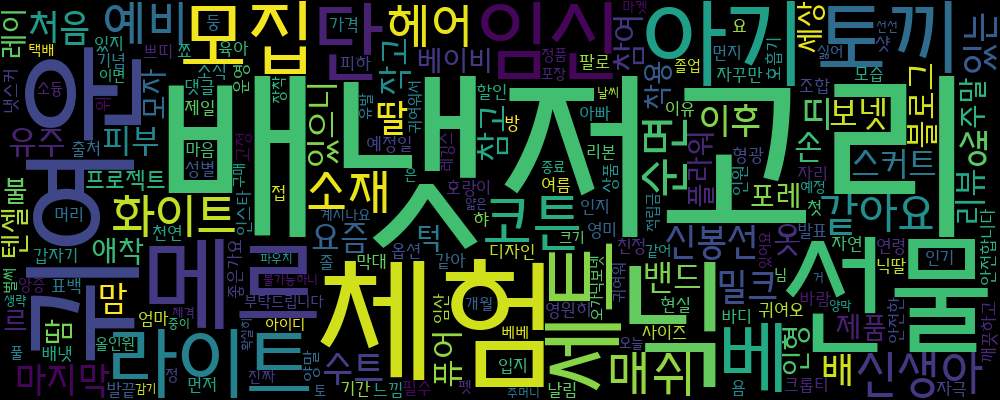

In [12]:
# 본문 내용 워드클라우드

wc=WordCloud(width=1000,
             height=400,
             font_path='C:/Windows/Fonts/KBIZ한마음고딕 R.ttf')
cloud=wc.fit_words(word_count)
cloud.to_image()

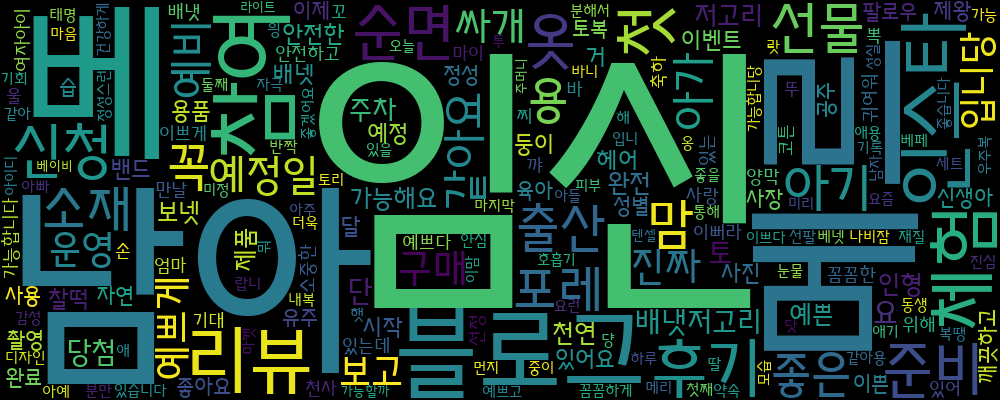

In [13]:
# 댓글 내용 워드클라우드

wc=WordCloud(width=1000,
             height=400,
             font_path='C:/Windows/Fonts/KBIZ한마음고딕 R.ttf')
cloud=wc.fit_words(word_count_review)
cloud.to_image()

본문내용, 댓글 파이차트

['영미', '선물', '출처', '신봉선', '배냇저고리', '세트', '친정', '엄마', '아빠', '딸', '임신', '소식', '처음', '접', '제일', '먼저', '귀여운', '양말', '바디', '수트', '고정', '있지', '자꾸만', '배', '크롭티', '바람', '현실', '육아', '피하', '이후', '영원히', '입지', '같아', '생', '마지막', '자리', '기념', '샷', '마음', '졸', '사이즈', '신생아', '모습', '느낌', '예정일', '쬬', '갑자기', '토끼', '띠', '호랑이', '머리', '발끝', '귀여오', '밀크', '있는', '스커트', '디자인', '퓨어', '화이트', '배냇', '여름', '인지', '인기', '요즘', '요', '옵션', '헤어', '밴드', '닉딸', '조합', '할인', '가격', '있으니', '참고', '욤', '냇스커', '쁘띠', '리본', '둥', '막대', '예비', '맘', '체험', '단', '모집', '위', '햐', '깨끗하고', '안전한', '메르', '베', '순면', '손', '좋은가요', '천연', '소재', '자연', '안전합니다', '먼지', '날림', '아기', '호흡기', '피부', '자극', '형광', '표백', '첫', '옷', '이유', '참여', '방', '팔로', '성별', '댓글', '기간', '연령', '임산', '인원', '발표', '상품', '보넷', '블로그', '리뷰', '인스타', '필수', '운영', '부탁드립니다', '베베', '정품', '닉', '졸업', '은', '작고', '소듕', '유주', '크기', '애착', '인형', '풀', '장착', '진짜', '같어', '이면', '벌써', '개월', '매쉬', '유발', '레깅스', '오가닉보넷', '귀여워', '귀여워서', '싫어', '정', '착용', '제품', '펫', '베이비', '올인원', '님', '앙증', '아이디', '적립금', '주말', '

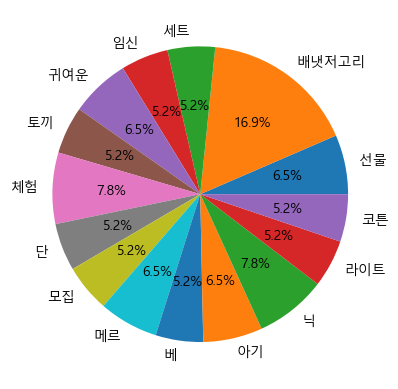

In [14]:
#본문내용 파이차트 그리기

key_list=list(word_count.keys())
value_list=list(word_count.values())
print(key_list)
print(value_list)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' #글씨체 설정해두기 (matplotlib 한글 깨지지 않게)

#본문내용 파이차트
frequency_key=[]
frequency_value=[]
for j in range(len(value_list)):
    if value_list[j] >3: #빈도수 3이상
        frequency_key.append(key_list[j])
        frequency_value.append(value_list[j])

print(frequency_key)
print(frequency_value)

plt.pie(frequency_value, labels=frequency_key, autopct='%.1f%%')
plt.show()

['분해서', '눈물', '우주복', '알았넹', '의미', '좋지만', '요즘', '훨', '이쁘답니다', '베넷', '저고리', '이쁘다', '났구낰', '맴', '애', '직접', '첫', '아가', '두번째', '마지막', '바', '진짜', '배넷', '케커', '만드까', '아기', '귀여워용', '귀요미', '자주', '즐거운', '하루', '귀여워', '미', '배냇저고리', '신생아', '시절', '엊그제', '같은데', '애기', '금방', '커버', '리', '깻잎', '예쁘게', '예비', '메르', '랏', '임신', '힘찬이네', '신청', '달꼼', '공주', '베', '옷', '선물', '꼼꼼하게', '블로그', '인스타', '리뷰', '생후', '남아', '주가', '방', '육아', '운영', '꼭', '당첨', '이제', '사용', '후기', '필', '링크', '주소', '있습니다', '아예', '보냇', '싸개', '태명', '토', '예비아빠', '무형', '광', '무표', '깨끗하고', '안전하고', '이쁘고', '드럽고', '먼지', '날림', '호흡기', '피부', '자극', '순면', '마음', '아주', '절실', '체험', '단', '선정', '아내', '성실', '좋아요', '팔로우', '돈', '여자아이', '복땡', '용', '가능합니당', '도해', '맘', '손', '찌때', '애정', '울', '찌', '메리', '위', '베템', '감성', '있어', '욥', '배냇', '요', '참여', '안전한', '아빠', '이모', '사당', '입니', '닷', '안심', '있을꺼', '같아용', '예쁜', '쥬', '준비', '럽둥', '토복', '딸맘', '베맘', '박스', '위해', '사랑', '이쁜', '보넷', '듬뿍', '딸', '네로', '출산', '입니당', '첫째', '애용', '뒤', '예정', '알밤', '좋을까요', '꼼꼼한', '정성', '어려운', '제품', '완전', '필수',

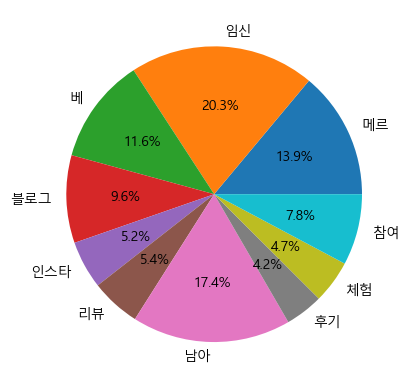

In [15]:
#댓글 파이차트

key_list=list(word_count_review.keys())
value_list=list(word_count_review.values())
print(key_list)
print(value_list)

frequency_key=[]
frequency_value=[]
for j in range(len(value_list)):
    if value_list[j] >20: #빈도수 20 이상
        frequency_key.append(key_list[j])
        frequency_value.append(value_list[j])

print(frequency_key)
print(frequency_value)

plt.pie(frequency_value, labels=frequency_key, autopct='%.1f%%')
plt.show()

수치 데이터 시각화

1. 좋아요수

   index  게시물번호  좋아요수
0      0      1  7052
1     13      2  여러 명
2     16      3  여러 명
3     17      4   390
4    254      5  여러 명
5    279      6   287
6    285      7   591
7    297      8   354
8    318      9  여러 명
9    320     10  여러 명
   index  게시물번호  좋아요수
0      0      1  7052
1     13      2     0
2     16      3     0
3     17      4   390
4    254      5     0
5    279      6   287
6    285      7   591
7    297      8   354
8    318      9     0
9    320     10     0


C:\Users\User\AppData\Local\Temp\ipykernel_21484\135032815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  like_df['좋아요수'][like]=0
C:\Users\User\AppData\Local\Temp\ipykernel_21484\135032815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  like_df['좋아요수'][like]=0
C:\Users\User\AppData\Local\Temp\ipykernel_21484\135032815.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  like_df['좋아요수'][like]=0
C:\Users\User\AppData\Local\Temp\i

<BarContainer object of 10 artists>

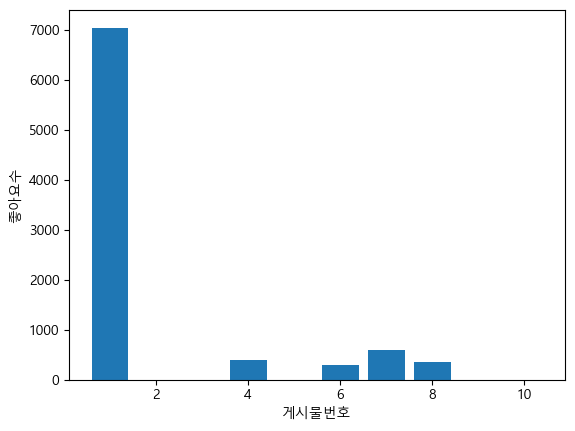

In [16]:
#좋아요수 막대그래프
like_df=df[['게시물번호','좋아요수']]
like_df=like_df.drop_duplicates()
like_df=like_df.reset_index()
print(like_df)

for like in range(len(like_df)):
    if like_df['좋아요수'][like]=='여러 명': #좋아요수 여러명인거 0으로 처리
        like_df['좋아요수'][like]=0

print(like_df)

x=like_df['게시물번호']

like_df['좋아요수']=like_df['좋아요수'].astype(int) #좋아요수 정수타입으로 변경
y=like_df['좋아요수']

x_val=x.values
x_list=x_val.tolist()
x_list=list(map(int,x_list))
#print(x_list)

y_val=y.values
y_list=y_val.tolist()
#print(y_list)

plt.xlabel('게시물번호')
plt.ylabel('좋아요수')
#plt.xlim([0,10])
#plt. ylim([0,8000])
plt.bar(x_list,y_list)

In [17]:
#좋아요수 가장 높은 게시물
df[df['게시물번호']==1]

,게시물번호,아이디,본문내용,해시태그,좋아요수,댓글아이디,댓글내용
0,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,make_it_count_0526,분해서 눈물이 났구나ㅋㅋㅋㅋ
1,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,su4224,엇 우주복인줄 알았넹
2,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,osoyu3,ㅎㅎ 의미도 좋지만 요즘엔 사는것이 훨 이쁘답니다^ ^ 근데 베넷저고리가 엄청 크네요😍😍
3,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,dd.mom1225,1년은 입겠네요ㅋㅋㅋ😍😍
4,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,rain__dog,❤️
5,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,blueciel1130,이쁘다❤️
6,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,solker_bell,@sssssu_b_ ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
7,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,hkhkyoung,@dear.la_yum 내맴같애😢..
8,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,jh__1__k,@jh_2__ @_.__.dam 우리도 직접 만들어주자. 첫번째 아가만. 두번째부터...
9,1,halbi.zzal,영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기...,"신봉선, 안영미, 출산선물, 아기, 배냇저고리, 선물, 감동, 눈물, 의리, 이모,...",7052,yjzzang_9_11,@me_eunjeong ㅋㅋㅋㅋ마지막까지봐바


In [18]:
df.loc[0]['본문내용']

'영미님에게 정말 잊지 못할 선물일듯.출처:ㄴ신봉선#신봉선 #안영미 #출산선물 #아기 #배냇저고리 #선물 #감동 #눈물 #의리 #이모 #사랑 #마음'

2. 댓글 수

In [19]:
a=df[['게시물번호']].value_counts()
print(a)


#게시물 번호별 댓글수 데이터 프레임
count_review=[0]*10
for i in range(10):
    for j in range(len(df)):
        if df['게시물번호'][j]==i+1:
            count_review[i]+=1

x=range(1,11)
df_column={'게시물번호':x,
           '댓글수':count_review}


df_count_review=pd.DataFrame(df_column)
print(df_count_review)

게시물번호
4        237
5         25
8         21
1         13
7         12
6          6
10         6
2          3
9          2
3          1
Name: count, dtype: int64
   게시물번호  댓글수
0      1   13
1      2    3
2      3    1
3      4  237
4      5   25
5      6    6
6      7   12
7      8   21
8      9    2
9     10    6


<BarContainer object of 10 artists>

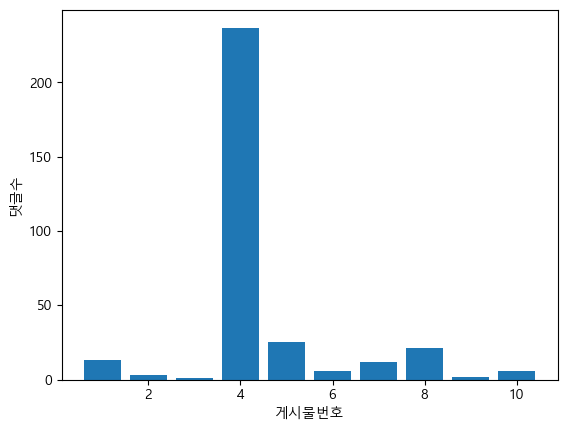

In [20]:
# 댓글 수 막대그래프
x=range(1,11)
plt.xlabel('게시물번호')
plt.ylabel('댓글수')
y=count_review
plt.bar(x,y)

In [21]:
#댓글 수 가장 많은 게시물
df[df['게시물번호']==4]

,게시물번호,아이디,본문내용,해시태그,좋아요수,댓글아이디,댓글내용
17,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,dlskagy,39주 여아 깻잎이 ❤️🧡💛💚💙💜 예쁘게 입히고 싶네용!
18,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,merebe_,예비메르님들모여랏🙌🏻
19,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,power_chani,임신 35주 + 여아 🐰 힘찬이네 신청해요👶🏻❣️
20,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,hyun.jung_moon,5월11일목욜 18주1일차 달꼼공주👶 입니다. 😍
21,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,bunny_stickyrice_,🩷29주 5일 여아🩷입니다!메르베 우리 아기 첫 옷으로 선물하고 싶어용:)꼼꼼하게 ...
...,...,...,...,...,...,...,...
249,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,wd_jmt,24주 3일차 여아입니다❤️❤️ 블로그와 인스타 모두 하고있어요❤️
250,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,__baby_tokkaeng,토깽이네 참여합니당 ꪑ\n29주 + 여아입니다 .ᐟ
251,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,violet_kitchen2020,35주 남아둥이 임신중이에요💙💙 곧 태어날 우리 둥이들한테 메르베 순면 체험해보고 ...
252,4,merebe_,🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험...,메르베,390,eun5517,28주2일+ 가을이(여자)


In [22]:
df.loc[17]['본문내용'] # 이벤트 게시글에서 댓글이 가장 많은 것으로 나타남

'🌼예비맘 체험단 모집예비맘들 위한 체험단은 처음이햐깨끗하고 안전한 메르베 순면 체험해 보실 분들 손✋🦋메르베 순면 왜 좋은가요?•100% 천연소재, 자연소재라 안전합니다•어떤 소재보다 먼지 날림이 적어 우리 아기들 호흡기에 피부에 자극적이지 않아요•메르베 순면은 형광, 표백을 하지 않아요우리 아기 첫 옷으로 메르베 해야 하는 이유 아시겠죠?🤲• 체험단 참여 방1. @merebe_ 팔로2. 임신 주 수와 아기 성별 댓글ex) 임신 25주+여모집 기간 : 05월 10일 - 05월 14모집 연령 : 임산모집 인원 : 10체험단 발표 : 5월 17체험 상품 : 배냇저고리+보넷+속싸⭐️블로그 리뷰와 인스타 리뷰는 필수⭐블로그도 함께 운영하시는 예비 메르님들의 많은 참여 부탁드립니다: #메르merebe.co.kr'